In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_8645/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../data/processed_data_without_anomaly.csv')

In [4]:
features = ['Lag_1_Status', 'Count_Alpa_7D', 'Count_Alpa_30D', 'Streak_Alpa', 'Avg_Arrival_Time_7D', 'DayOfWeek']
le = LabelEncoder()

X = df[features]
# Encode 'Lag_1_Status' in the features
X['Lag_1_Status'] = le.fit_transform(X['Lag_1_Status'].astype(str))

y = le.fit_transform(df['note'].astype(str))

/tmp/ipykernel_8645/3542950029.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Lag_1_Status'] = le.fit_transform(X['Lag_1_Status'].astype(str))


In [5]:
# 80% train-test split

split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Data Latih: {X_train.shape[0]} baris")
print(f"Data Uji: {X_test.shape[0]} baris")

Data Latih: 100905 baris
Data Uji: 25227 baris


In [6]:
model_rf = RandomForestClassifier(random_state=42, max_depth=7, max_features=3, min_samples_split=5, n_estimators=50)


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.49      0.59     15551
           1       0.47      0.74      0.58      9676

    accuracy                           0.58     25227
   macro avg       0.61      0.61      0.58     25227
weighted avg       0.64      0.58      0.58     25227


Confusion Matrix for Random Forest:


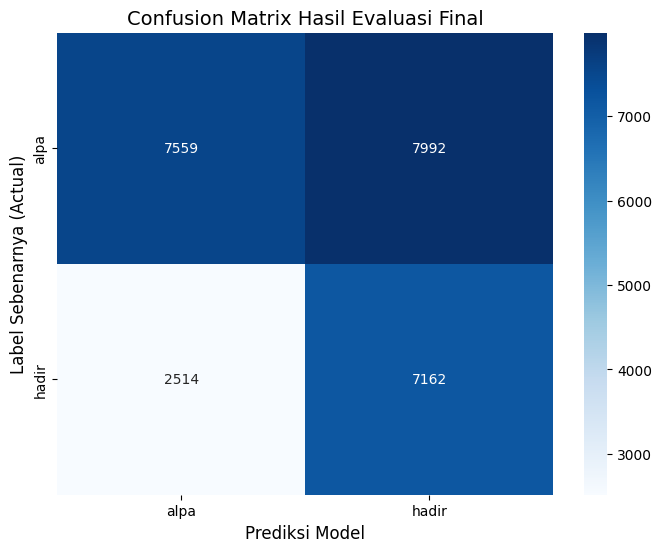

In [8]:
y_pred = model_rf.fit(X_train, y_train).predict(X_test)

# Print classification report
print(f"\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred))

report = classification_report(y_test, y_pred, output_dict=True)
result = {
    'Model': 'Random Forest',
    'Accuracy': report['accuracy'],
    'Macro F1': report['macro avg']['f1-score'],
    'Macro Recall': report['macro avg']['recall'],
    'Macro Precision': report['macro avg']['precision']
}

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix for Random Forest:")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
              xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prediksi Model', fontsize=12)
plt.ylabel('Label Sebenarnya (Actual)', fontsize=12)
plt.title('Confusion Matrix Hasil Evaluasi Final', fontsize=14)
plt.show()

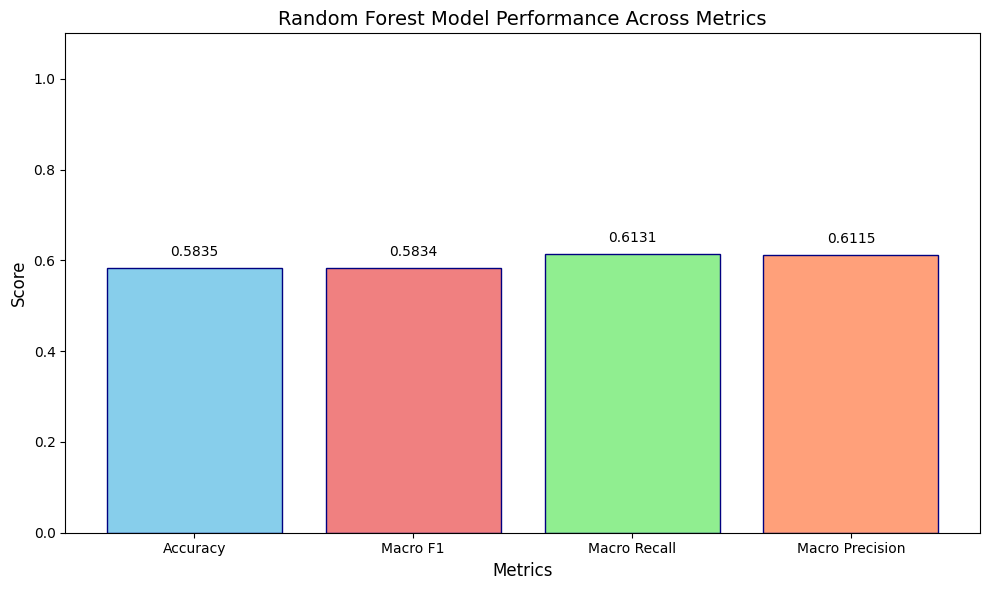

In [9]:
# Visualize metrics for the Random Forest model
metrics_names = ['Accuracy', 'Macro F1', 'Macro Recall', 'Macro Precision']
metrics_values = [result['Accuracy'], result['Macro F1'], result['Macro Recall'], result['Macro Precision']]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'], edgecolor='navy')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.title('Random Forest Model Performance Across Metrics', fontsize=14)
plt.ylim(0, 1.1)

# Add value labels on bars
for bar, value in zip(bars, metrics_values):
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
       f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
